Import thư viện

In [12]:
# Import các thư viện cần thiết
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm
import scipy.stats as stats

plt.style.use('seaborn-v0_8')
sns.set_palette("Set2")


Đọc dữ liệu

In [13]:
xiaomi = pd.read_csv('../Dataset/Xiaomi_clean.csv', parse_dates=['Date'])
samsung = pd.read_csv('../Dataset/Samsung_clean.csv', parse_dates=['Date'])
apple = pd.read_csv('../Dataset/Apple_clean.csv', parse_dates=['Date'])

# Sắp xếp theo thời gian
for df in [xiaomi, samsung, apple]:
    df.sort_values('Date', inplace=True)
    df.reset_index(drop=True, inplace=True)

Ma trận tương quan giá Close

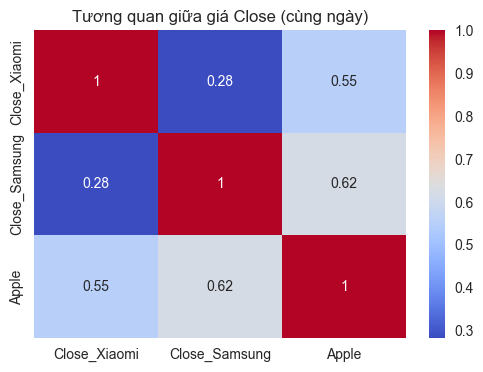

In [21]:
merged = (
    xiaomi[['Date', 'Close']]
    .merge(samsung[['Date', 'Close']], on='Date', suffixes=('_Xiaomi', '_Samsung'))
    .merge(apple[['Date', 'Close']], on='Date')
    .rename(columns={'Close': 'Apple'})
)

plt.figure(figsize=(6,4))
sns.heatmap(merged[['Close_Xiaomi', 'Close_Samsung', 'Apple']].corr(), annot=True, cmap='coolwarm')
plt.title("Tương quan giữa giá Close (cùng ngày)")
plt.show()


Chuẩn hóa và so sánh tốc độ tăng trưởng tương đối

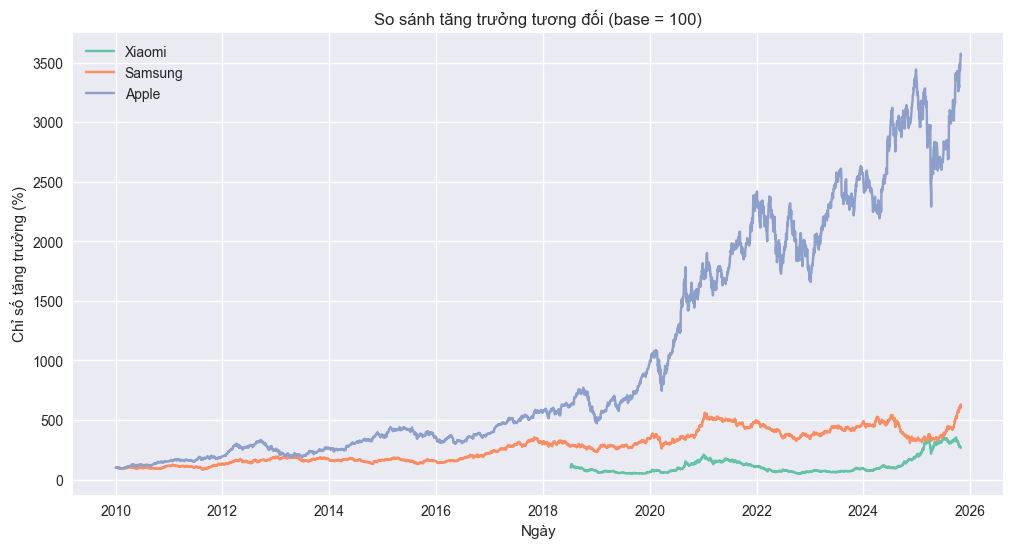

In [22]:
plt.figure(figsize=(12,6))
for df, label in zip([xiaomi, samsung, apple], ['Xiaomi', 'Samsung', 'Apple']):
    base = df['Close'].iloc[0]
    plt.plot(df['Date'], (df['Close'] / base) * 100, label=label)

plt.title("So sánh tăng trưởng tương đối (base = 100)")
plt.ylabel("Chỉ số tăng trưởng (%)")
plt.xlabel("Ngày")
plt.legend()
plt.show()
